#  Neural Networks: Street View Housing Number Digit Recognition


Welcome to the project on classification using Artificial Neural Networks. We will work with the Street View Housing Numbers (SVHN) image dataset for this project.

--------------
### **Context:** 
--------------

One of the most interesting tasks in deep learning is to recognize objects in natural scenes. The ability to process visual information using machine learning algorithms can be very useful as demonstrated in various applications.

The SVHN dataset contains over 600,000 labeled digits cropped from street level photos. It is one of the most popular image recognition datasets. It has been used in neural networks created by Google to improve map quality by automatically transcribing the address numbers from a patch of pixels. The transcribed number with a known street address helps pinpoint the location of the building it represents. 

----------------
### **Objective:**
----------------

Build a feed forward neural network model that can identify the digits in the images. 

-------------
### **Dataset**
-------------
Here, we will use a subset of the original data to save some computation time. The dataset is provided as a .h5 file. The basic preprocessing steps have been done.


## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense, Activation, BatchNormalization
from tensorflow.keras.utils import to_categorical 

In [3]:
print(tf.__version__)

2.7.0


In [5]:
import h5py
h5f = h5py.File('/content/SVHN_single_grey1.h5', 'r')
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]

h5f.close()

In [6]:
len(X_train), len(X_test)

(42000, 18000)

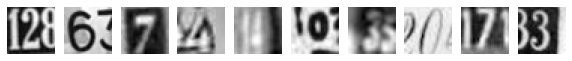

label for each of the above image [2 6 7 4 4 0 3 0 7 3]


In [7]:
plt.figure(figsize=(10,1))

for i in range(10):
  plt.subplot(1,10,i+1)
  plt.imshow(X_train[i], cmap='gray')
  plt.axis('off')

plt.show()
print('label for each of the above image {}'.format(y_train[0:10]))

## **Data preparation**

- Print the first image in the train image and figure out the shape of the images
- Reshape the train and the test dataset to flatten them. Figure out the required shape
- Normalize the train and the test dataset by dividing by 255
- Print the new shapes of the train and the test set
- One-hot encode the target variable

In [8]:
print('shape:',X_train[0].shape)
print()
print('First Image:',X_train[0])

shape: (32, 32)

First Image: [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


In [9]:
X_train = X_train.reshape(X_train.shape[0], 1024)
X_test = X_test.reshape(X_test.shape[0], 1024)

In [10]:
X_train = X_train / 255
X_test = X_test / 255

In [11]:
print('shape train:', X_train.shape, y_train.shape)
print('shape test:', X_test.shape, y_test.shape)

shape train: (42000, 1024) (42000,)
shape test: (18000, 1024) (18000,)


In [12]:
# one hot encode output
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

y_test

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

## Model Buildin

In [13]:
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

### **Model Architecture**
- Building a model with the following architecture
 - First hidden layer with **64 nodes and relu activation** and the input shape which is used above
 - Second hidden layer with **32 nodes and relu activation**
 - Output layer with **softmax activation and number of nodes equal to the number of classes**
 -Compile the model with the **categorical_crossentropy loss, adam optimizer (learning_rate = 0.001), and accuracy metric**.
- Print the summary of the model
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and 20 epochs**. Store the model building history to use later for visualization.

In [15]:
from tensorflow.keras import losses, optimizers

# create model
model_1 = Sequential()

model_1.add(Dense(64, activation='relu', input_shape=(1024,)))
model_1.add(Dense(32, activation='relu'))
model_1.add(Dense(10, activation='softmax'))

# compile model
adam = optimizers.Adam(learning_rate=0.001)
model_1.compile(loss=losses.categorical_crossentropy, optimizer=adam, metrics=['accuracy'])

# summary
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                65600     
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 10)                330       
                                                                 
Total params: 68,010
Trainable params: 68,010
Non-trainable params: 0
_________________________________________________________________


In [16]:
history_model_1 = model_1.fit(X_train, y_train, validation_split=0.2, epochs=20, batch_size=128, verbose=1)

Epoch 1/20
263/263 [==============================] - 4s 10ms/step - loss: 2.2968 - accuracy: 0.1121 - val_loss: 2.2641 - val_accuracy: 0.1365
Epoch 2/20
263/263 [==============================] - 2s 7ms/step - loss: 2.1260 - accuracy: 0.2057 - val_loss: 1.9909 - val_accuracy: 0.2689
Epoch 3/20
263/263 [==============================] - 2s 8ms/step - loss: 1.8549 - accuracy: 0.3374 - val_loss: 1.6914 - val_accuracy: 0.4063
Epoch 4/20
263/263 [==============================] - 2s 8ms/step - loss: 1.6149 - accuracy: 0.4441 - val_loss: 1.5213 - val_accuracy: 0.5030
Epoch 5/20
263/263 [==============================] - 2s 7ms/step - loss: 1.4541 - accuracy: 0.5207 - val_loss: 1.3888 - val_accuracy: 0.5550
Epoch 6/20
263/263 [==============================] - 2s 7ms/step - loss: 1.3445 - accuracy: 0.5648 - val_loss: 1.3216 - val_accuracy: 0.5842
Epoch 7/20
263/263 [==============================] - 2s 7ms/step - loss: 1.2758 - accuracy: 0.5928 - val_loss: 1.2601 - val_accuracy: 0.6032
Epoch

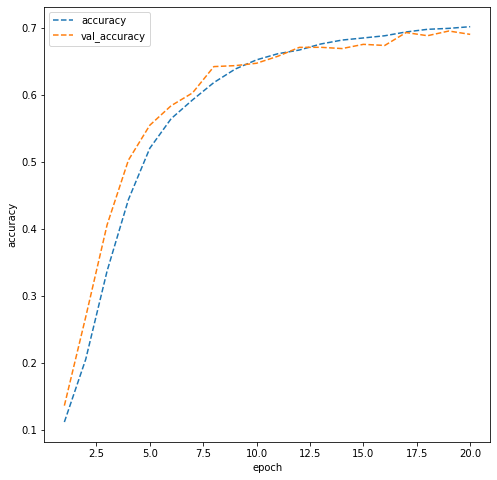

In [18]:
dict_hist = history_model_1.history
list_ep = [i for i in range(1,21)]

plt.figure(figsize=(8,8))
plt.plot(list_ep, dict_hist['accuracy'], ls='--', label='accuracy')
plt.plot(list_ep, dict_hist['val_accuracy'], ls='--', label='val_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()

**Observations:**

- The accuracy on the train set is slightly better (less than 1%) than the validation set but the difference is very small. We can say that model is giving a generalized performance.
- The plot shows that training accuracy is increasing with epochs but the validation accuracy has started to fluctuate after 10 epochs. However, the overall validation accuracy is also increasing with epochs.

Let's build one more model with higher complexity and see if we can improve the performance of the model. 

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

In [19]:
from tensorflow.keras import backend
backend.clear_session()

In [20]:
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

### **Second Model Architecture**
- Building a sequential model with the following architecture
 - First hidden layer with **256 nodes and relu activation**
 - Second hidden layer with **128 nodes and relu activation**
 - Add the **Dropout layer with rate equal to 0.2**
 - Third hidden layer with **64 nodes and relu activation**
 - Fourth hidden layer with **64 nodes and relu activation**
 - Fifth hidden layer with **32 nodes and relu activation**
 - Add the **BatchNormalization layer**
 - Output layer with **softmax activation and number of nodes equal to the number of classes**
 -Compile the model with the **categorical_crossentropy loss, adam optimizer (learning_rate = 0.0005), and accuracy metric**. 
- Print the summary of the model
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and 30 epochs**. Store the model building history to use later for visualization.

In [22]:
model2 = Sequential()

model2.add(Dense(256, activation='relu', input_shape=(1024,)))
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(32, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dense(10, activation='softmax'))
adam = optimizers.Adam(learning_rate=0.0005)
model2.compile(loss=losses.categorical_crossentropy, optimizer=adam, metrics='accuracy')
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 256)               262400    
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 64)                4160      
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 batch_normalization_1 (Batc  (None, 32)              

In [23]:
history_model2 = model2.fit(X_train, y_train, validation_split=0.2, epochs=30, batch_size=128, verbose=1)

Epoch 1/30
263/263 [==============================] - 6s 17ms/step - loss: 2.3457 - accuracy: 0.1037 - val_loss: 2.3102 - val_accuracy: 0.1010
Epoch 2/30
263/263 [==============================] - 4s 15ms/step - loss: 2.1911 - accuracy: 0.1682 - val_loss: 2.0927 - val_accuracy: 0.2636
Epoch 3/30
263/263 [==============================] - 4s 16ms/step - loss: 1.6761 - accuracy: 0.4196 - val_loss: 1.5196 - val_accuracy: 0.5058
Epoch 4/30
263/263 [==============================] - 3s 10ms/step - loss: 1.3795 - accuracy: 0.5436 - val_loss: 1.2876 - val_accuracy: 0.5858
Epoch 5/30
263/263 [==============================] - 3s 10ms/step - loss: 1.2175 - accuracy: 0.6064 - val_loss: 1.1249 - val_accuracy: 0.6364
Epoch 6/30
263/263 [==============================] - 3s 11ms/step - loss: 1.1329 - accuracy: 0.6336 - val_loss: 1.1325 - val_accuracy: 0.6388
Epoch 7/30
263/263 [==============================] - 3s 10ms/step - loss: 1.0704 - accuracy: 0.6563 - val_loss: 1.0166 - val_accuracy: 0.6827

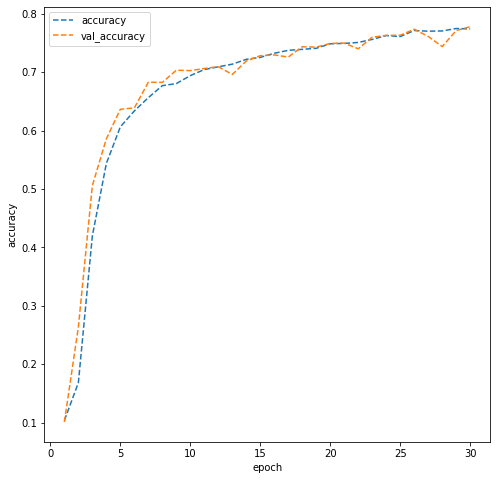

In [24]:
dict_his = history_model2.history
list_ep = [i for i in range(1,31)]

plt.figure(figsize=(8,8))
plt.plot(list_ep, dict_his['accuracy'], ls='--', label='accuracy')
plt.plot(list_ep, dict_his['val_accuracy'], ls='--', label='val_accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

**Observations:**

- The second model which is more complex than the previous model is performing significantly better.
- The train and validation accuracy has improved by approx 15%.
- The validation accuracy is slightly higher than training accuracy which implies that the model complexity can be further increased.
- The plot shows that the train and validation accuracies have an upward trend even after 30 epochs which implies that the number of epochs can be increased.

## **Predictions on the test data**

- Make predictions on the test set using the second model
- Print the obtained results using the classification report and the confusion matrix
- Final observations from the obtained results

In [25]:
test_pred = model2.predict(X_test)
test_pred = np.argmax(test_pred, axis=-1)

In [26]:
#Converting each entry to single label from one-hot encoded vector
y_test = np.argmax(y_test, axis=-1)

              precision    recall  f1-score   support

           0       0.86      0.77      0.81      1814
           1       0.72      0.85      0.78      1828
           2       0.79      0.80      0.80      1803
           3       0.73      0.75      0.74      1719
           4       0.77      0.85      0.81      1812
           5       0.80      0.75      0.77      1768
           6       0.85      0.75      0.80      1832
           7       0.82      0.83      0.82      1808
           8       0.72      0.74      0.73      1812
           9       0.80      0.75      0.77      1804

    accuracy                           0.78     18000
   macro avg       0.79      0.78      0.78     18000
weighted avg       0.79      0.78      0.78     18000



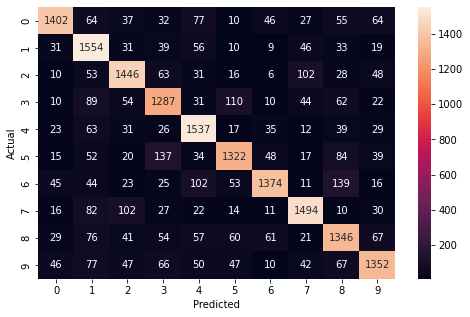

In [27]:
#importing required functions
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#Printing the classification report
print(classification_report(y_test, test_pred))

#Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_test, test_pred)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.0f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

#### **Observations:**

- The accuracy is 77% on the test set. This is comparable with the results on the train and the validation sets which implies that the model is giving a generalized performance. 
- The recall values for all the digits are higher than 70% with 5 and 6 having the least recall values of 71%.
- The confusion matrix shows that the model has confused 5 and 6 digits with digit 8 the most number of times. This might be due to the similar orientation of these digits.
- The highest recall of about 85% is for digit 4 i.e. the model can identify 85% of images with digit 4.
- The precision values have more variation (from 69% to 87%) than recall (from 71% to 85%).
- The least precision of 69% is for digit 3. The confusion matrix shows that the model confused it with digit 9 the most number of times which is understandable as these digits have very similar orientations.
- This indicates that the model is not able to identify small variations among digits.

**Note:** We can try tuning this model further or increase the complexity of the model and see if we can get better results. As this is image data, we can also try convolutional neural networks which might be able to identify small variations in the orientation of digits and give better results than simple feed-forward neural networks.